In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [24]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/CreditApproval.xlsx")
df.head()

,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,1.0,40.0,345000.0,1.0,345000.0,100.0,301.0,6000.0,1.0,874.0,875.0,345000.0,345000.0,0.0,1.0
1,0.0,31.0,350000.0,7.0,55716.0,100.0,301.0,6000.0,1.0,874.0,875.0,390000.0,111428.0,0.0,1.0
2,0.0,37.0,649926.0,6.0,108321.0,100.0,301.0,6000.0,1.0,874.0,875.0,649926.0,216642.0,0.0,1.0
3,1.0,2.0,459168.0,12.0,38264.0,100.0,301.0,6000.0,1.0,874.0,875.0,459168.0,382640.0,0.0,1.0
4,1.0,34.0,3055499.0,8.0,381937.0,100.0,301.0,6000.0,1.0,874.0,875.0,3055499.0,1527749.0,0.0,1.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jenis_kelamin           766 non-null    float64
 1   umur                    766 non-null    float64
 2   jml_pinjaman            766 non-null    float64
 3   jkw                     766 non-null    float64
 4   jml_angsuran_per_bulan  766 non-null    float64
 5   type_pinjaman           766 non-null    float64
 6   jenis_pinjaman          766 non-null    float64
 7   bi_sektor_ekonomi       766 non-null    float64
 8   col                     766 non-null    float64
 9   bi_golongan_debitur     766 non-null    float64
 10  bi_gol_penjamin         766 non-null    float64
 11  saldo_nominatif         766 non-null    float64
 12  tunggakan_pokok         766 non-null    float64
 13  tunggakan_bunga         766 non-null    float64
 14  status kredit           766 non-null    fl

In [26]:
from sklearn.preprocessing import StandardScaler

In [93]:
# X = df.iloc[:,0:20]
# y = df.iloc[:, -1]
# scaler = StandardScaler()
# scaled = StandardScaler().fit_transform(X)

In [95]:
# print(scaled)

[[-0.90259726 -0.9900495   0.83077942 ... -1.78686097 -1.00601811
   0.98609664]
 [-0.49513857  1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 [-1.5376865   1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
  -1.01409939]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
   0.98609664]
 [-1.65833069  1.0100505   0.58562134 ...  0.55964063  0.99401789
   0.98609664]]


In [27]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [28]:
scaled_data = scaler.transform(df)


In [29]:
print(scaled_data)

[[ 0.81117733 -0.0331278  -0.23700718 ... -0.10759909 -0.15446935
   0.61457127]
 [-1.23277607 -0.06775227 -0.23650663 ... -0.164065   -0.15446935
   0.61457127]
 [-1.23277607 -0.04466929 -0.20648123 ... -0.13862957 -0.15446935
   0.61457127]
 ...
 [-1.23277607 -0.07929376 -0.07132618 ... -0.04595298  0.16250977
   0.61457127]
 [ 0.81117733 -0.06775227 -0.14015137 ...  0.12629351 -0.01579098
   0.61457127]
 [ 0.81117733 -0.04851645 -0.07132618 ...  0.0507468   0.02163016
   0.61457127]]


In [30]:
from sklearn.decomposition import PCA


In [31]:
pca = PCA(n_components=2)

In [32]:
pca.fit(scaled_data)

PCA(n_components=2)

In [33]:
x_pca = pca.transform(scaled_data)

In [34]:
scaled_data.shape


(766, 15)

In [35]:
x_pca.shape

(766, 2)

In [43]:
# df.keys()


Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

Text(0, 0.5, 'Principal Component 2')

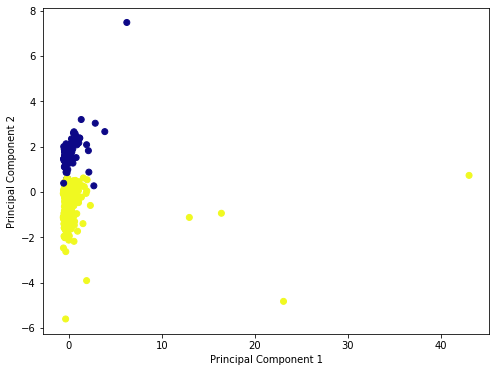

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['status kredit'],cmap='plasma')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


In [37]:
pca.components_


array([[-7.19004636e-02, -3.88730950e-03,  4.89154181e-01,
         2.88128938e-02,  3.02566573e-01, -4.23516474e-22,
        -3.22342597e-03, -4.56801461e-03, -1.13806621e-02,
         1.76015660e-03,  5.37426254e-02,  4.84901417e-01,
         4.84757611e-01,  4.35766090e-01,  1.01552788e-02],
       [-1.55021075e-01, -6.59663416e-02,  2.65347498e-02,
        -1.46320758e-01,  2.91664671e-01,  0.00000000e+00,
         6.28155135e-02, -8.48813018e-02, -4.42971171e-01,
         1.34632961e-01, -3.97403445e-01,  2.21741395e-02,
        -1.01628959e-01, -1.08156055e-01, -6.77116892e-01]])

In [38]:
df_comp = pd.DataFrame(pca.components_,columns=df.keys())


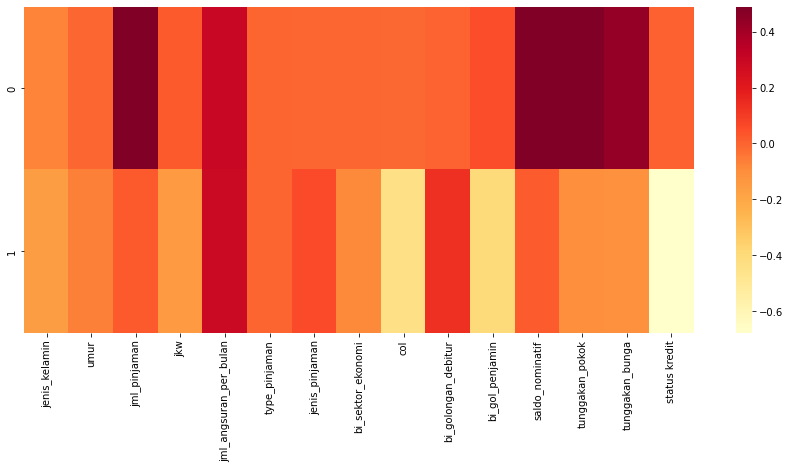

In [39]:
plt.figure(figsize=(15,6))
sns.heatmap(df_comp,cmap='YlOrRd',)
